### Package Versions

- **Python version**: `3.9.13`
- **NumPy version**: `1.23.5`
- **Matplotlib version**: `3.4.2`
- **SciPy version**: `1.9.1`
- **Pandas version**: `1.5.3`



In [9]:
# Import the necessary libraries
import numpy as np # For calculations
import matplotlib.pyplot as plt # For plotting 
from scipy.optimize import curve_fit # For curve fitting
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator) #make plot nicer
import pandas as pd # For reading the data
import os #For flexible path way to data

In [10]:
# Define the path in a more flexible way
root_folder = os.getcwd()
data_file = os.path.join(root_folder, 'pressureRatio.dat')
#Read data file using pandas package
data = pd.read_csv(data_file, delim_whitespace=True )
columns_title =data.columns
print("Column tiltes", columns_title)
data.head()

Column tiltes Index(['Num', 'Radius', 'R_e+', 'R_e-', 'E1', 'E1_e+', 'E1_e-', 'E2', 'E2_e+',
       'E2_e+.1', 'ratio', 'r_e+', 'r_e-'],
      dtype='object')


,Num,Radius,R_e+,R_e-,E1,E1_e+,E1_e-,E2,E2_e+,E2_e+.1,ratio,r_e+,r_e-
0,1,221.1,11.0,12.3,8.30,0.76,0.88,9.67,1.14,1.12,0.86,0.08,0.07
1,2,268.5,22.1,20.7,4.92,0.77,0.70,4.19,0.82,0.70,1.17,0.16,0.15
2,3,138.4,12.7,11.9,3.03,0.53,0.49,2.61,0.59,0.49,1.16,0.20,0.18
3,4,714.3,23.5,34.5,49.61,3.15,3.19,60.62,4.84,6.13,0.82,0.06,0.05
4,5,182.3,18.5,15.1,2.75,0.49,0.43,3.30,0.81,0.61,0.83,0.14,0.14


### Section a)

For calculating the wighted average for the data set $\{x_1,\cdots,x_N\}$, such that $x_i$ has uncertainty $\sigma_i$; we require to define some wight for $x_i$ such as
$$ w_i :=\frac{1}{\sigma_i^2}, \sigma_i^2 := \frac{r_{e+}+r_{e-}}{2}$$
then according to the definition the wighted average will be 
$$ \bar{x} := \frac{\sum_{i=1}^{N}x_i\times w_i}{\sum_{i=1}^{N} w_i}.$$

In [11]:
# Function to calculate weighted average and standard deviation
def weighted_average_std(u_bound, l_bound, data):
    '''u_bound and l_bound are lists of floats given by input data set
    data is given list of float numbers that are given in each column
    output: float numbers average wighted and Standard deviation'''
    sigma2 = ((u_bound+l_bound)/2)**2 # Average the asymmetric errors
    weight = 1/sigma2
    return np.sum(data*weight)/np.sum(weight) , np.sqrt(1/np.sum(weight))
# Weighted average and standard deviation for 'ratio'
weighted_avg ,weighted_std  = weighted_average_std(data['r_e+'],data['r_e-'],data['ratio'])
# Print the result
print(f"Weighted Average of ratio: {weighted_avg :.2f} ± {weighted_std:.2f}")

Weighted Average of ratio: 0.90 ± 0.02


### Section b)
The linear averaging is the unweighted averaging. So , the Linear average of the data set will be:
$$\bar{x} := \frac{\sum_{i=1}^{N} x_i}{N}.$$

The standard deviation of the linear average is simply the square root of the sum of the squared individual uncertainties, divided by the number of data points.
$$ \sigma_{linear} := \sqrt{\frac{1}{N^2}\sum_{i=1}^N \sigma_i^2} $$


In [81]:
#linear averaging
def Linear_average(u_bound, l_bound, data):
    Linear_average = np.mean(data) # Mean of Data
    Linear_std = np.sqrt(np.mean(((u_bound+l_bound)/2)**2)) # mean of the averaged uncertainties
    return Linear_average, Linear_std

# Linear average and standard deviation for 'ratio'
linear_avg ,linear_std  = Linear_average(data['r_e+'],data['r_e-'],data['ratio'])
# Print the result round of 
print(f"Linear Average of ratio: {linear_avg :.2f} ± {linear_std:.2f}")

Linear Average of ratio: 1.01 ± 0.14


### Visualize the linear and weighted averaging for ratio

In [72]:
def Plot_linear_vs_weighted_average_median(data_name, U_bound_name, L_bound_name,unit=None):
    """
    Function to plot data points with error bars, comparing linear and weighted averages along with their uncertainties.

    Parameters:
    - data (DataFrame): The dataset containing the data to plot.
    - data_name (str): The name of the data column to be plotted (e.g., 'ratio').
    - upper_bound (str): The name of the column for the upper bound of uncertainties (e.g., 'r_e+').
    - lower_bound (str): The name of the column for the lower bound of uncertainties (e.g., 'r_e-').
    - unit (str, optional): The unit of measurement. If not provided, units will not be shown in labels.
    """

    median = np.median(data[data_name])
    
    # Find the total number of data points in the dataset
    n = len(data[data_name])
    
    # Find the index of the median value by sorting the data and locating the middle index
    median_index = np.argsort(data[data_name])[n // 2]

    # Linear average and standard deviation for given data
    linear_avg ,linear_std  = Linear_average(data[U_bound_name],data[L_bound_name],data[data_name])
    # Weighted average and standard deviation for 'ratio'
    weighted_avg ,weighted_std  = weighted_average_std(data[U_bound_name],data[L_bound_name],data[data_name])
    #Print the values
    print(f'Linear Average of {data_name} ({unit}): {linear_avg :.2f} ± {linear_std:.2f}({unit})' if unit else f'Linear Average of {data_name}:  {linear_avg :.2f} ± {linear_std:.2f}')
    print(f'weighted Average of {data_name} ({unit}): {weighted_avg :.2f} ± {weighted_std:.2f}({unit})' if unit else f'Linear Average of {data_name}:  {weighted_avg :.2f} ± {weighted_std:.2f}')
    print(f'The median of {data_name} ({unit}): {median :.2f}({unit})' if unit else f'The median of {data_name}: {median :.2f}')
    
    # Plot the data points with error bars
    plt.errorbar(range(n), data[data_name],
                 yerr=[data[L_bound_name], data[U_bound_name]],
                 fmt='o', label='Data with uncertainties', color='blue', ecolor='lightgray')

    # Plot the linear average as a red dashed line, with its uncertainty band as a shaded region
    plt.axhline(y=linear_avg, color='red', linestyle='--',
                label=f'Linear Average: {linear_avg:.2f}({unit})' if unit else f'Linear Average: {linear_avg:.2f}')
    plt.fill_between(range(n), linear_avg - linear_std, linear_avg + linear_std,
                     color='red', alpha=0.2, label=f'Linear Avg Std: ±{linear_std:.2f}({unit})' if unit else f'Linear Avg Std: ±{linear_std:.2f}')
    # Plot the median as a single point with a red marker
    plt.plot(median_index, median, 'ro',
             label=f'Median: {median:.2f}', markersize=10, markerfacecolor='purple')
    # Plot the weighted average as a green dashed line, with its uncertainty band as a shaded region
    plt.axhline(y=weighted_avg, color='green', linestyle='--',
                label=f'Weighted Average: {weighted_avg:.2f}({unit})' if unit else f'Weighted Average: {weighted_avg:.2f}')
    plt.fill_between(range(n), weighted_avg - weighted_std, weighted_avg + weighted_std,
                     color='green', alpha=0.2, label=f'Weighted Avg Std: ±{weighted_std:.2f}({unit})' if unit else f'Weighted Avg Std: ±{weighted_std:.2f}')
    # Create the ylabel with or without the unit
    ylabel = f"{data_name} ({unit})" if unit else f"{data_name}"
    plt.ylabel(ylabel)

    # Create the plot title with or without the unit
    title = f'Linear vs Weighted Average with Uncertainties {data_name} ({unit})' if unit else f'Weighted Average and Median for {data_name}'
    plt.title(title)

    # Label the x-axis
    plt.xlabel('Measurement Index')

    # Add a legend to describe the plot elements
    plt.legend()

    # Show the plot
    plt.show()


Linear Average of ratio:  1.01 ± 0.14
Linear Average of ratio:  0.90 ± 0.02
The median of ratio: 1.02


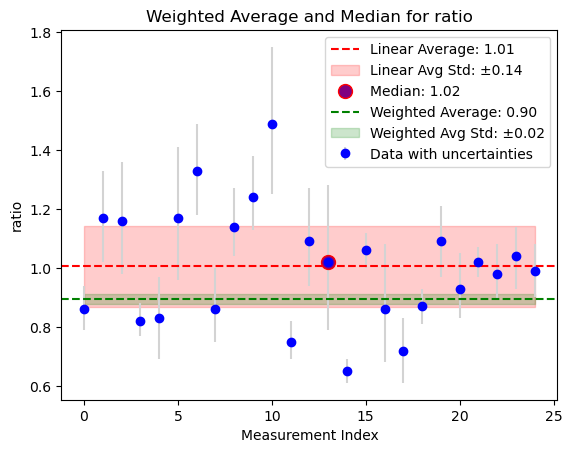

In [73]:
# Plotting the 'ratio' dataset by comparing linear and weighted averages with their uncertainties
# 'ratio': The name of the data column to be plotted
# 'r_e+': The upper bound column for the uncertainties
# 'r_e-': The lower bound column for the uncertainties
# None: The unit of measurement (optional, here it represents no unit for this example)
Plot_linear_vs_weighted_average_median('ratio', 'r_e+', 'r_e-', None)


The linear average is often greater than the weighted average because the linear average gives equal importance to all values, including those with large uncertainties (which are often extreme). The weighted average, on the other hand, downweights these less reliable (extreme) values, resulting in a smaller overall average.
In the weighted average, the extreme values with large uncertainties are downweighted, meaning they contribute less to the final result. This results in the weighted average being "pulled" towards the more reliable, lower-uncertainty data points, which are often closer to the center of the distribution (closer to the true value).

### Section c,d)


In [14]:
# Recalculate the weighted average with additional uncertainty (+0.1)
weighted_avg_with_extra_p, weighted_std_with_extra_p = weighted_average_std(data['r_e+']+0.1,data['r_e-']+0.1,data['ratio'])
# Recalculate the weighted average with additional uncertainty (-0.1)
weighted_avg_with_extra_m, weighted_std_with_extra_m= weighted_average_std(data['r_e+']-0.1,data['r_e-']-0.1,data['ratio'])
# Recalculate the weighted average with additional uncertainty(+0.6)
weighted_avg_with_extra_6, weighted_std_with_extra_6= weighted_average_std(data['r_e+']+0.6,data['r_e-']+0.6,data['ratio'])

# Print the result
print(f"Weighted Average with extra uncertainty (+0.1): {weighted_avg_with_extra_p:.2f} ± {weighted_std_with_extra_p:.2f}")
print(f"Weighted Average with extra uncertainty (-0.1): {weighted_avg_with_extra_m:.2f} ± {weighted_std_with_extra_m:.2f}")
print(f"Weighted Average with extra uncertainty (+0.6): {weighted_avg_with_extra_6:.2f} ± {weighted_std_with_extra_6:.2f}")




Weighted Average with extra uncertainty (+0.1): 0.95 ± 0.04
Weighted Average with extra uncertainty (-0.1): 0.98 ± 0.00
Weighted Average with extra uncertainty (+0.6): 0.99 ± 0.14


When we add 0.1 to the uncertainties $\sigma_i$ we have :
$$  {\sigma_i^2}^{\pm0.1} := (\frac{r_{e+}+r_{e-}}{2} \pm 0.1 )^2>\sigma_i^2,$$
$$ {w_i}^{\pm0.1} :=\frac{1}{ {\sigma_i^2}^{\pm0.1}} =\frac{1}{ ({\sigma_i}\pm0.1)^2} < w_i.$$

Then according to the definition the wighted average we can show 
$$ \bar{x}^{\pm0.1} = \frac{\sum_{i=1}^{N}x_i\times {w_i}^{\pm0.1} }{\sum_{i=1}^{N} {w_i}^{\pm0.1} } > \bar{x}.$$

It means: 
- Adding $\pm 0.1$ to the uncertainties reduces the relative importance of data points with small uncertainties, and increases the relative importance of data points with larger uncertainties.
- This change in the weighting system shifts the weighted average towards values that were previously downweighted.
- The more uncertainties you add, the more the weighted average moves toward the linear average because the differences between data point weights become smaller.

**In the following you can compare these values and see how new weighted average for different values of added uncertainty (+0.1, -0.1, +0.6) is getting cloose to the linear average.**

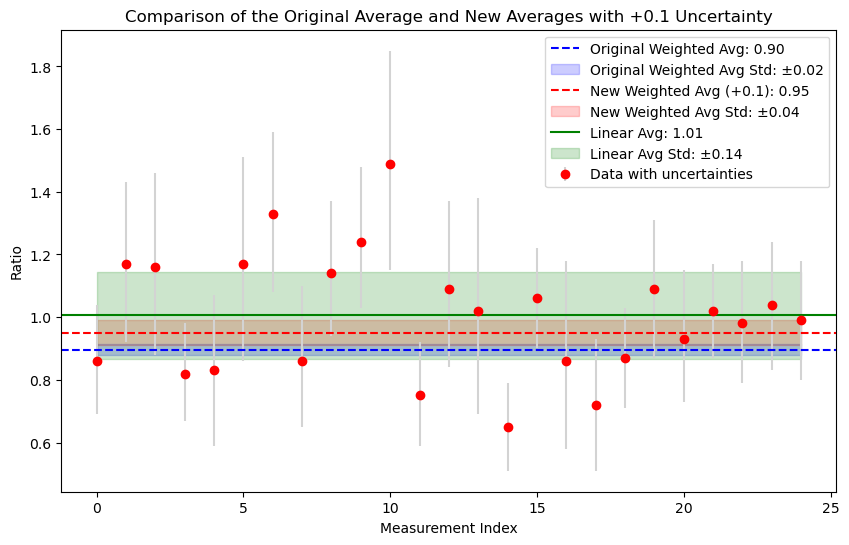

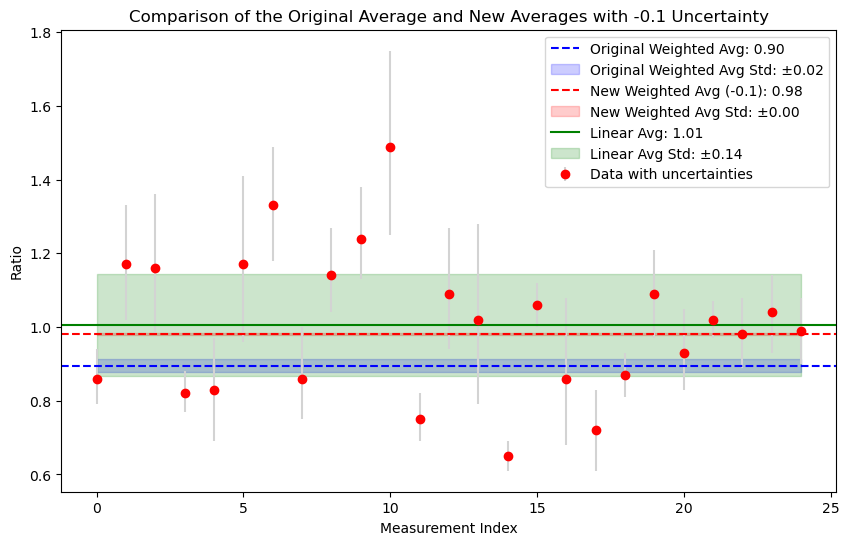

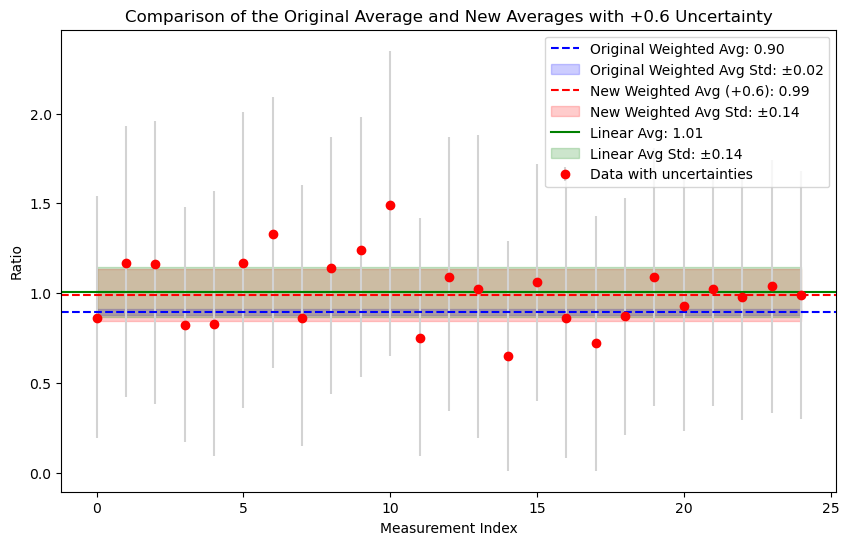

In [36]:
# Plot to Compare old and new averages (both weighted and linear) for +0.1 uncertainty added
plt.figure(figsize=(10, 6))

# Plot the data points with error bars (+0.1 uncertainty added to both lower and upper bounds)
plt.errorbar(range(n), data['ratio'], yerr=[data['r_e-']+0.1, data['r_e+']+0.1], fmt='o',
             label='Data with uncertainties', color='red', ecolor='lightgray')

# Plot the original weighted average as a blue dashed line
plt.axhline(y=weighted_avg, color='blue', linestyle='--', label=f'Original Weighted Avg: {weighted_avg:.2f}')
# Plot the shaded region representing the uncertainty of the original weighted average
plt.fill_between(range(n), weighted_avg - weighted_std, weighted_avg + weighted_std,
                 color='blue', alpha=0.2, label=f'Original Weighted Avg Std: ±{weighted_std:.2f}')

# Plot the new weighted average with added uncertainty (+0.1), shown as a red dashed line
plt.axhline(y=weighted_avg_with_extra_p, color='red', linestyle='--',
            label=f'New Weighted Avg (+0.1): {weighted_avg_with_extra_p:.2f}')
# Shaded region for the new weighted average with its uncertainty
plt.fill_between(range(n), weighted_avg_with_extra_p - weighted_std_with_extra_p,
                 weighted_avg_with_extra_p + weighted_std_with_extra_p,
                 color='red', alpha=0.2, label=f'New Weighted Avg Std: ±{weighted_std_with_extra_p:.2f}')

# Plot the linear average (same in both cases, as uncertainty does not affect linear average)
plt.axhline(y=linear_avg, color='green', linestyle='-', label=f'Linear Avg: {linear_avg:.2f}')
# Shaded region for the linear average uncertainty
plt.fill_between(range(n), linear_avg - linear_std, linear_avg + linear_std,
                 color='green', alpha=0.2, label=f'Linear Avg Std: ±{linear_std:.2f}')

# Label the x-axis and y-axis
plt.xlabel('Measurement Index')
plt.ylabel('Ratio')

# Title to indicate comparison with +0.1 uncertainty
plt.title('Comparison of the Original Average and New Averages with +0.1 Uncertainty')

# Display the legend to explain the lines and shaded areas
plt.legend()

# Show the plot
plt.show()


# Plot to Compare old and new averages (both weighted and linear) for -0.1 uncertainty added
plt.figure(figsize=(10, 6))

# Plot the data points with error bars for the original uncertainties (no additional uncertainty)
plt.errorbar(range(n), data['ratio'], yerr=[data['r_e-'], data['r_e+']], fmt='o',
             label='Data with uncertainties', color='red', ecolor='lightgray')

# Plot the original weighted average as a blue dashed line
plt.axhline(y=weighted_avg, color='blue', linestyle='--', label=f'Original Weighted Avg: {weighted_avg:.2f}')
# Shaded region for the original weighted average uncertainty
plt.fill_between(range(n), weighted_avg - weighted_std, weighted_avg + weighted_std,
                 color='blue', alpha=0.2, label=f'Original Weighted Avg Std: ±{weighted_std:.2f}')

# Plot the new weighted average with reduced uncertainty (-0.1), shown as a red dashed line
plt.axhline(y=weighted_avg_with_extra_m, color='red', linestyle='--',
            label=f'New Weighted Avg (-0.1): {weighted_avg_with_extra_m:.2f}')
# Shaded region for the new weighted average with its uncertainty
plt.fill_between(range(n), weighted_avg_with_extra_m - weighted_std_with_extra_m,
                 weighted_avg_with_extra_m + weighted_std_with_extra_m,
                 color='red', alpha=0.2, label=f'New Weighted Avg Std: ±{weighted_std_with_extra_m:.2f}')

# Plot the linear average (same in both cases)
plt.axhline(y=linear_avg, color='green', linestyle='-', label=f'Linear Avg: {linear_avg:.2f}')
# Shaded region for the linear average uncertainty
plt.fill_between(range(n), linear_avg - linear_std, linear_avg + linear_std,
                 color='green', alpha=0.2, label=f'Linear Avg Std: ±{linear_std:.2f}')

# Label the x-axis and y-axis
plt.xlabel('Measurement Index')
plt.ylabel('Ratio')

# Title to indicate comparison with -0.1 uncertainty
plt.title('Comparison of the Original Average and New Averages with -0.1 Uncertainty')

# Display the legend
plt.legend()

# Show the plot
plt.show()


# Plot to Compare old and new averages (both weighted and linear) for +0.6 uncertainty added
plt.figure(figsize=(10, 6))

# Plot the data points with error bars (+0.6 uncertainty added to both lower and upper bounds)
plt.errorbar(range(n), data['ratio'], yerr=[data['r_e-']+0.6, data['r_e+']+0.6], fmt='o',
             label='Data with uncertainties', color='red', ecolor='lightgray')

# Plot the original weighted average as a blue dashed line
plt.axhline(y=weighted_avg, color='blue', linestyle='--', label=f'Original Weighted Avg: {weighted_avg:.2f}')
# Shaded region for the original weighted average uncertainty
plt.fill_between(range(n), weighted_avg - weighted_std, weighted_avg + weighted_std,
                 color='blue', alpha=0.2, label=f'Original Weighted Avg Std: ±{weighted_std:.2f}')

# Plot the new weighted average with added uncertainty (+0.6), shown as a red dashed line
plt.axhline(y=weighted_avg_with_extra_6, color='red', linestyle='--',
            label=f'New Weighted Avg (+0.6): {weighted_avg_with_extra_6:.2f}')
# Shaded region for the new weighted average with its uncertainty
plt.fill_between(range(n), weighted_avg_with_extra_6 - weighted_std_with_extra_6,
                 weighted_avg_with_extra_6 + weighted_std_with_extra_6,
                 color='red', alpha=0.2, label=f'New Weighted Avg Std: ±{weighted_std_with_extra_6:.2f}')

# Plot the linear average (same in both cases)
plt.axhline(y=linear_avg, color='green', linestyle='-', label=f'Linear Avg: {linear_avg:.2f}')
# Shaded region for the linear average uncertainty
plt.fill_between(range(n), linear_avg - linear_std, linear_avg + linear_std,
                 color='green', alpha=0.2, label=f'Linear Avg Std: ±{linear_std:.2f}')

# Label the x-axis and y-axis
plt.xlabel('Measurement Index')
plt.ylabel('Ratio')

# Title to indicate comparison with +0.6 uncertainty
plt.title('Comparison of the Original Average and New Averages with +0.6 Uncertainty')

# Display the legend
plt.legend()

# Show the plot
plt.show()


### Section e)
Here I use the function `Plot_linear_vs_weighted_average_median' from section b. I defined a list of the wanted data and I plot linear average, weighted average and the median for $E_1,E_2$, Radius, and ratio.


Linear Average of Radius (m): 239.95 ± 13.05(m)
weighted Average of Radius (m): 181.98 ± 1.78(m)
The median of Radius (m): 196.20(m)


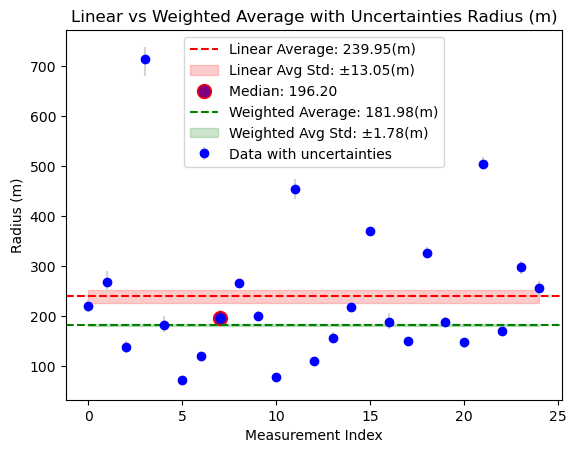

Linear Average of E1 (J): 10.59 ± 1.20(J)
weighted Average of E1 (J): 2.93 ± 0.09(J)
The median of E1 (J): 5.04(J)


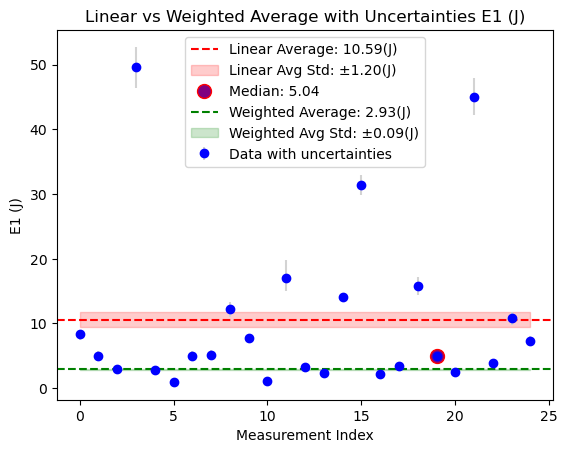

Linear Average of E2 (J): 11.47 ± 1.57(J)
weighted Average of E2 (J): 1.75 ± 0.07(J)
The median of E2 (J): 4.75(J)


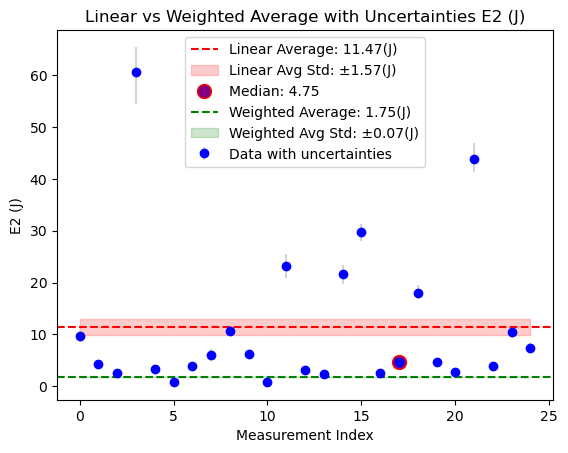

Linear Average of ratio:  1.01 ± 0.14
Linear Average of ratio:  0.90 ± 0.02
The median of ratio: 1.02


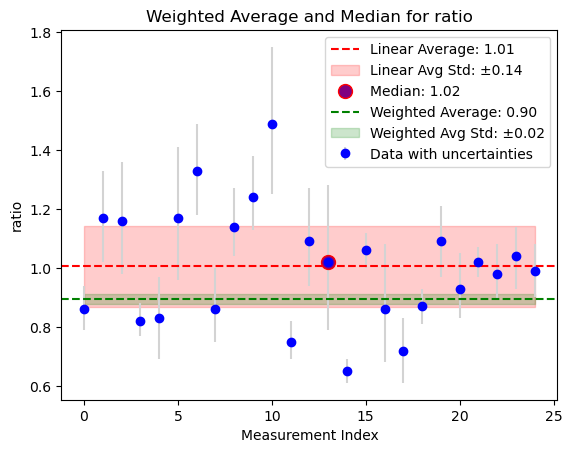

In [74]:
# Define a list of data columns and their associated error bounds and units
data_column = [
    ['Radius', 'R_e+', 'R_e-', 'm'],  # 'Radius' data with error bounds and units in meters (m)
    ['E1', 'E1_e+', 'E1_e-', 'J'],    # 'E1' data with error bounds and units in joules (J)
    ['E2', 'E2_e+', 'E2_e+.1', 'J'],  # 'E2' data with error bounds and units in joules (J)
    ['ratio', 'r_e+', 'r_e-', None]   # 'ratio' data with error bounds and no unit (None)
]

# Loop through each data configuration in data_column
for data_name in data_column:
    # Call the Plot_median_average function with the data column names and units
    # data_name[0]: The main data column name
    # data_name[1]: The upper bound column name
    # data_name[2]: The lower bound column name
    # data_name[3]: The unit (can be None if no unit is provided)
    Plot_linear_vs_weighted_average_median(data_name[0], data_name[1], data_name[2], data_name[3])




In [83]:

# Function to plot the weighted logarithmic average
def plot_weighted_log_avg(data_name, U_bound_name, L_bound_name,unit=None):
    # Find the total number of data points in the dataset
    n = len(data[data_name])

    # Step 1: Calculate logarithmic values of ratio
    log_data = np.log(data[data_name])


    # Step 2: Calculate the weighted average of the logarithmic ratios
    log_weighted_avg, weighted_average_std(data[U_bound_name], data[L_bound_name],log_data )

    # Step 3: Convert the result back to linear scale by exponentiation
    weighted_log_avg = np.exp(log_weighted_avg)
    # Print the result
    print(f'Weighted Logarithmic Average (converted back to linear scale) of {data_name}: {weighted_log_avg:.2f}({unit})' if unit else f'Weighted Logarithmic Average (converted back to linear scale) of {data_name}: {weighted_log_avg:.2f}({unit})')

    # Plot the data points with error bars
    plt.errorbar(range(n), data['data_name'], yerr=[data[L_bound_name], data[U_bound_name]], fmt='o', label=f'{data_label} with uncertainties', color='blue', ecolor='lightblue')

    # Plot the weighted logarithmic average as a horizontal line
    plt.axhline(y=weighted_log_avg, color='orange', linestyle='--', label=f'Weighted Log Avg: {weighted_log_avg:.2f}')

    # Label the plot
    plt.xlabel('Measurement Index')
    plt.ylabel(data_name+ '('+unit+')')
    plt.title(f'Weighted Logarithmic Average for {data_name}({unit})' if unit else f'Weighted Logarithmic Average for {data_name}')
    plt.legend()

    # Show the plot
    plt.show()
# calculate  logarithmic weighted average of ratio
plot_weighted_log_avg('ratio', 'r_e+', 'r_e-', None)

TypeError: unsupported format string passed to numpy.ndarray.__format__